**Import required packages**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


import pandas as pd
# pd.core.common.is_list_like = pd.api.types.is_list_like  # can remove this when v0.7 of pdr is available
import pandas_datareader.data as web
import datetime as dt
# Stock prices method based on https://pythonprogramming.net/getting-stock-prices-python-programming-for-finance/


%load_ext autoreload
%autoreload 2

**Specific current holdings and target allocation**
+ Specify the current holdings of each equity in the `num_shares` list
+ The example portfolios here are provided as-is for education purposes. They do not constitute a recommended or endorsed investment stragegy

In [24]:

# ## a portfolio based on the pre-2018 Betterment strategy (international heavy)
# symbs = ["SCHB", "VTI", "VTV", "VOE", "VBR", "VEA", "SCHF", "VWO", "IEMG", "VXUS"]
# target_alloc = [0.087, 0.087, 0.178, 0.05, 0.05, 0.205, 0.205, .0655, .0655, 0]
# num_shares = np.array([45, 31, 42, 5, 20, 31, 32, 41, 21, 32])  ## Your current holdings of each equity (number of shares)



# ## an all-stock "lazy" Bogleheads portfolio
# symbs = ['VTI','SCHB','VXUS']
# target_alloc = [.35, .35, .3]
# num_shares = np.array([13,26,27])## Your current holdings of each equity (number of shares)


## a portfolio based on the Betterment 2018 all-stock allocation
symbs = ['SCHB','VTI','VXUS','VOE','VBR','VEA','VWO','VXUS']
target_alloc = [0.1765, 0.1765, 0.094, 0.077, 0.065, 0.1295, 0.076, 0.205]
num_shares = np.array([150,60,90,43,23,170,100,220]) ## Your current holdings of each equity (number of shares)



df = web.get_data_tiingo(symbs,  dt.datetime(2015, 1, 1), dt.datetime.now(), api_key='fd6be678e3f58d880e4f0ef734becdc463617354')

## If this throws 404 then the API is having problems
# df = web.DataReader(symbs, 'iex', dt.datetime(2015, 1, 1), dt.datetime.now()) 

## If this throws 404 then the API is having problems
## Robinhood limited to 1 year historical data
# df = web.DataReader(symbs, 'robinhood', dt.datetime(2015, 1, 1), dt.datetime.now()) 


curr_prices = np.array([df.loc[symb]['close_price'][-1] for symb in symbs])
curr_prices = curr_prices.astype(float)
curr_value = num_shares.dot(curr_prices)
curr_alloc = (num_shares*curr_prices)/curr_value

KeyError: 'close_price'

In [17]:
df = web.DataReader(symbs, 'robinhood', dt.datetime(2015, 1, 22), dt.datetime(2015, 1, 24)) 

In [18]:
df

close_price high_price  interpolated  low_price open_price  \
symbol begins_at                                                               
SCHB   2017-12-27   63.496700  63.585100         False  63.418100  63.496700   
       2017-12-28   63.634200  63.653800         False  63.511400  63.624400   
       2017-12-29   63.369000  63.800200         False  63.339500  63.742200   
       2018-01-02   63.830600  63.830600         False  63.506500  63.614500   
       2018-01-03   64.184200  64.232300         False  63.879700  63.909200   
       2018-01-04   64.429700  64.557400         False  64.357800  64.380600   
       2018-01-05   64.842300  64.871700         False  64.518100  64.665500   
       2018-01-08   64.989600  65.015200         False  64.709700  64.822600   
       2018-01-09   65.097600  65.274400         False  65.011700  65.087800   
       2018-01-10   64.989600  65.068100         False  64.714600  64.930600   
       2018-01-11   65.549400  65.549400         False  65.117300  65.127100   
       2018-01-12   65.942300  65.962900         False  65.598500  65.608300   
       2018-01-16   65.618200  66.415300         False  65.488900  66.286000   
       2018-01-17   66.256600  66.354800         False  65.706600  65.893200   
       2018-01-18   66.109200  66.315500         False  66.006900  66.246700   
       2018-01-19   66.472600  66.482500         False  66.168200  66.295800   
       2018-01-22   67.012800  67.012800         False  66.433400  66.433400   
       2018-01-23   67.179800  67.227900         False  66.924400  67.022600   
       2018-01-24   67.130700  67.484300         False  66.806600  67.179800   
       2018-01-25   67.140500  67.366400         False  66.924400  67.366400   
       2018-01-26   67.837800  67.837800         False  67.268200  67.346800   
       2018-01-29   67.395900  67.798600         False  67.346800  67.700300   
       2018-01-30   66.698500  67.022600         False  66.571800  66.865500   
       2018-01-31   66.669100  67.081600         False  66.423500  66.934300   
       2018-02-01   66.649400  66.963700         False  66.447500  66.492300   
       2018-02-02   65.254800  66.325300         False  65.225300  66.276200   
       2018-02-05   62.642200  65.313700         False  62.455600  64.744000   
       2018-02-06   63.752100  63.860100         False  61.247500  61.571700   
       2018-02-07   63.437800  64.439600         False  63.437800  63.614500   
       2018-02-08   61.159100  63.536000         False  61.129700  63.536000   
...                       ...        ...           ...        ...        ...   
VXUS   2018-11-13   49.181700  49.567600         False  48.983900  49.171800   
       2018-11-14   49.330100  49.636800         False  49.003600  49.528000   
       2018-11-15   49.686300  49.795100         False  48.954200  49.043200   
       2018-11-16   49.686300  49.785200         False  49.241100  49.300400   
       2018-11-19   49.260900  49.628700         False  49.112500  49.597200   
       2018-11-20   48.261600  48.711100         False  48.172600  48.548500   
       2018-11-21   49.003600  49.260900         False  48.884900  48.884900   
       2018-11-23   48.696900  48.845300         False  48.617800  48.617800   
       2018-11-26   49.340000  49.424100         False  49.154200  49.251000   
       2018-11-27   49.221300  49.231200         False  48.894900  49.082800   
       2018-11-28   50.072100  50.072100         False  49.102600  49.310300   
       2018-11-29   49.824800  50.030000         False  49.656400  49.765400   
       2018-11-30   49.676400  49.686400         False  49.451600  49.498300   
       2018-12-03   50.388700  50.556800         False  50.210800  50.448100   
       2018-12-04   49.161900  50.240300         False  49.104500  50.190900   
       2018-12-05   49.161900  49.161900          True  49.161900  49.161900   
       2018-12-06   48.756300  48.756300         False  47.774100  48.251700   
       2018-12-07 

In [ ]:
np.loadtxt('sample_portfolio.txt')

In [3]:
sim_shares = np.copy(num_shares)
sim_alloc = np.copy(curr_alloc)
num_buys = 10000
cost = 0

buy_series = list()
cost_series = [0]
drift_series = list()

for ii in range(num_buys):
    drift = sim_alloc - target_alloc
    net_drift = np.sum(np.abs(drift))
    rel_drift = (drift*curr_prices)/curr_prices
    ordering = np.argsort(rel_drift)
    buy_index = ordering[0]
    
    
    cost += curr_prices[buy_index]
    
    sim_shares[buy_index] += 1
    sim_alloc = (sim_shares*curr_prices)/(sim_shares.dot(curr_prices))
    
    buy_series.append(buy_index)
    cost_series.append(cost)
    drift_series.append(net_drift)
cost_series = np.array(cost_series)
buy_series = np.array(buy_series)

Text(0,0.5,'Total portfolio drift')

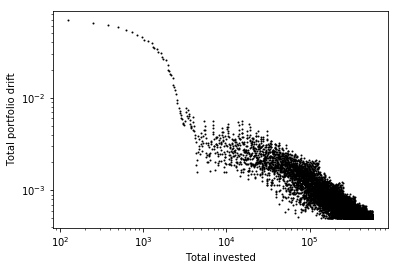

In [4]:
plt.figure()
plt.loglog(cost_series[1:], drift_series,'.k', markersize=2)
plt.xlabel('Total invested')
plt.ylabel('Total portfolio drift')

In [5]:
sum_to_invest = 15000

stop_ind = len(cost_series[cost_series<sum_to_invest])-1
buy_series_truncated = buy_series[:stop_ind]
inds, cts = np.unique(buy_series_truncated, return_counts=True)

print("Investing strategy:")
for ind, ct in zip(inds,cts):
    print(str(symbs[ind]), ': ', str(ct))

print('\nResidual balance: ', str(sum_to_invest - cost_series[stop_ind]))

print('\nResidual drift: ', str(100*drift_series[stop_ind]),'%')

Investing strategy:
SCHB :  37
VTI :  28
VXUS :  35
VOE :  9
VBR :  13
VEA :  50
VWO :  25
VXUS :  54

Residual balance:  36.64000000001579

Residual drift:  0.2226284330297451 %
